# Henyey–Greenstein Phase Function and Anisotropy Factor *g*

The Henyey–Greenstein (HG) phase function is a one-parameter scattering phase function that interpolates from purely backward-scattering ($g=-1$) through isotropic ($g=0$) to strongly forward-scattering ($g\to+1$). It is usually given by:

\begin{equation*}
p(\theta)=\frac{1-g^{2}}{4\pi\!\left(1+g^{2}-2g\cos\theta\right)^{3/2}},
\end{equation*}

which is normalized over $4\pi$ steradians to 1. Here $g=\langle\cos\theta\rangle$ is the **anisotropy factor** (mean cosine of the scatter angle). For $g=0$, $p(\theta)$ reduces to isotropic scattering ($p$ constant); for $g>0$ it is peaked in the forward direction ($\theta=0$).  In fact, $g$ itself is the first Legendre moment of the phase function (the average cosine of scattering).

---

## Legendre Expansion of the HG Phase Function

A key property of the HG function is that it has a **simple Legendre polynomial expansion**. In particular, the HG phase function can be expanded in a series of Legendre polynomials $P_n(\mu)$ (with $\mu=\cos\theta$) whose coefficients are powers of $g$. In normalized form (integrating to 1 over $-1\le\mu\le1$), one finds:

\begin{equation*}
p(\mu)\;=\;\sum_{n=0}^{\infty}\,\frac{2n+1}{2}\,a_n\,P_n(\mu)\,
\end{equation*}

where the $a_n$ are the Legendre expansion coefficients. For the HG phase function, **these coefficients turn out to be $a_n = g^n$ (for $n\ge 0$) [(1)](https://www.astro.umd.edu/%7Ejph/HG_note.pdf#:~:text=It%E2%80%99s%20also%20known%20that%20the,%284)**. In other words, the $n$-th Legendre moment of the HG phase function is simply $g^n$. This yields the expansion (dropping the normalization factor here for clarity):

\begin{equation*}
p(\mu)\;=\;(2\!\cdot\!0+1)g^{0}P_{0}(\mu)
\;+\;(2\!\cdot\!1+1)g^{1}P_{1}(\mu)
\;+\;(2\!\cdot\!2+1)g^{2}P_{2}(\mu)
\;+\;\cdots
\end{equation*}

Up to normalization constants, this means:

- **The isotropic term** ($P_{0}=1$) has weight $\propto g^{0}=1$.
- **The first-order term** ($P_{1}=\mu$) has weight $\propto g^{1}=g$  
  (which indeed equals the asymmetry factor itself).
- **The second-order term** has weight $\propto g^{2}$, and so on.

Each higher Legendre term is suppressed by an additional factor of $g$ relative to the previous term. For a strongly forward-scattering medium ($g$ close to 1), the series decays slowly, meaning many Legendre orders contribute significantly to $p(\mu)$. Conversely, if $g$ is small, the series converges quickly (nearly isotropic). The expansion above can be verified; in fact, one can show the HG function *exactly* equals this infinite
Legendre series [(1)](https://www.astro.umd.edu/%7Ejph/HG_note.pdf#:~:text=It%E2%80%99s%20also%20known%20that%20the,%284).

---

## Appearance of $g$ in Redistribution Matrices – the $\boldsymbol{\delta}$–M Method

In radiative transfer, especially the **adding–doubling method**, one works with discretized angular fluxes. Scattering is represented via **redistribution matrices** $h(\mu_i,\mu_j)$ that give the fraction of intensity scattered from an incident direction $\mu_i$ into a scattered direction $\mu_j$. For a homogeneous, azimuthally-symmetric phase function, this redistribution function can be expanded in the same Legendre series. In practice we compute the matrix elements using the Legendre expansion evaluated at the discrete quadrature angles. For example, for two directions in the **same hemisphere** (the $H^{++}$ quadrant, meaning incident and scattered $\mu>0$), an element of the single-scattering redistribution matrix can be written as 

\begin{equation*}
H^{++}_{ij}\;=\;h^{*}(\mu_i,\mu_j)
              \;=\;\sum_{k=0}^{M-1}(2k+1)\,\chi_k^{*}\,P_k(\mu_i)\,P_k(\mu_j)\,,
\end{equation*}

where $\{\mu_i\},\{\mu_j\}$ are the discrete cosines (e.g.\ Gauss–Legendre quadrature points) for the upward and downward directions.  Here $\{\chi_k^{*}\}$ are the **effective Legendre coefficients** used in the numerical scheme, and $M$ is the number of Legendre terms retained in the expansion (related to the number of
streams or quadrature points). The form above shows that each Legendre term $P_k$ contributes to the matrix weighted by a coefficient involving $g^{\,k}$ (as we will make explicit shortly). The summation is typically truncated at order $M-1$ when using $M$ discrete streams in the adding–doubling method.

**Why truncate the series?** For a strongly forward-scattering phase function like HG with large $g$, the infinite series converges slowly, so a straightforward truncation at a finite $M$ streams can introduce significant errors (missing the “forward peak” energy). **Wiscombe’s $\delta$–M method** [(2)](https://omlc.org/%7Eprahl/pubs/pdf/prahl02b.pdf#:~:text=7,34%2C%201408%E2%80%931422%20%281977) addresses this by splitting the phase function into two parts:  

1. a **$\delta$-function forward spike** (to represent the highly peaked forward scattering beyond the
   truncated order), and  
2. a **residual phase function** expanded in the first $M\!-\!1$ Legendre polynomials.  

In essence, the highest-order Legendre moments are “scaled out” as an impulse at $\mu=1$ (cosine of scattering angle = 1, i.e.\ exact forward direction).  
This ensures energy in the forward lobe is treated properly even with few streams.
Wiscombe (1977) showed that the original phase function can be approximated by [(3)](https://omlc.org/software/ad/ad.pdf#:~:text=by%20a%20phase%20function%20consisting,M%20X%E2%88%921%20k%3D0):

\begin{equation*}
p^{*}(\mu)\;=\;2\,g^{M}\,\delta(1-\mu)\;+\;
              (1-g^{M})\sum_{k=0}^{M-1}(2k+1)\,\chi_k^{*}\,P_k(\mu)\,.
\end{equation*}

In this expression, the first term $2g^{M}\delta(1-\mu)$ is a **Dirac delta** at the forward direction, with weight chosen as $2g^{M}$. (Intuitively, $g^{M}$ is about the magnitude of the $M$-th and higher-order moments of the HG function, so
this delta term represents the “missing” forward-scattering probability when we truncate at order $M\!-\!1$.) The second term is the truncated Legendre series ($k=0$ to $M\!-\!1$) accounting for the **diffuse** part of the phase function, scaled by the remaining weight $(1-g^{M})$.  The coefficients $\{\chi_k^{*}\}$ here are adjusted (renormalized) from the original Legendre coefficients so
that the truncated series (when scaled by $1-g^{M}$) still matches the original phase function’s lower moments. Wiscombe derived the renormalized coefficients are [(4)](https://omlc.org/software/ad/ad.pdf#:~:text=%CF%87%20%E2%88%97%20k%20%3D%20%CF%87k,and%20%CF%87k%20%3D%201%202):

\begin{equation*}
\chi_k^{*}\;=\;\frac{\chi_k - g^{M}}{1-g^{M}}\;,
\end{equation*}

and for HG specifically, $\chi_k = g^{k}$, so that for **Henyey–Greenstein** we get the remarkably simple form [(5)](https://omlc.org/software/ad/ad.pdf#:~:text=%CF%87%20%E2%88%97%20k%20%3D%20g,gM%201%20%E2%88%92%20gM):

\begin{equation*}
\chi_k^{*}\;=\;\frac{g^{\,k}-g^{M}}{1-g^{M}}
\qquad\text{(HG truncated coefficients).}
\end{equation*}

This formula makes clear how the **anisotropy factor $g$** enters each term:  
the weight for Legendre order $k$ contains $g^{\,k}$ (and also $g^{M}$ from the truncation).  Each $\chi_k^{*}$ is essentially the original HG coefficient $g^{\,k}$, minus a piece $g^{M}$ (the “leftover” forward-peak contribution), all divided by $(1-g^{M})$ to renormalize the non-$\delta$ part [(5)](https://omlc.org/software/ad/ad.pdf#:~:text=%CF%87%20%E2%88%97%20k%20%3D%20g,gM%201%20%E2%88%92%20gM).

**Example:** If we truncate after $M$ streams, say $M=3$ (keeping $k=0,1,2$ in the diffuse expansion), the renormalized
weights would be:

- **Order $k=0$**: $\displaystyle\chi_0^{*}
  =\frac{g^{0}-g^{3}}{1-g^{3}}=\frac{1-g^{3}}{1-g^{3}}=1$.
- **Order $k=1$**: $\displaystyle\chi_1^{*}
  =\frac{g^{1}-g^{3}}{1-g^{3}}=\frac{g-g^{3}}{1-g^{3}}$.
- **Order $k=2$**: $\displaystyle\chi_2^{*}
  =\frac{g^{2}-g^{3}}{1-g^{3}}$.

The omitted forward-scattering portion has total weight $g^{3}$ (which went into the $\delta$-function term). In the limit of **no truncation** ($M\!\to\!\infty$), $g^{M}\!\to\!0$, $\chi_k^{*}\!\to\!g^{k}$ and the series reverts to the original infinite expansion. On the other hand, if $g$ is very large (near 1) and $M$ is small, $g^{M}$ is also near 1, meaning most of the scattering is shunted into the $\delta$-peak and the diffuse part $(1-g^{M})$ is small (the remaining scattering is treated by the few Legendre terms).

---

## Construction of Quadrant Redistribution Matrices ($H^{++}$)

In an adding–doubling radiative transfer model, one typically discretizes angles into “upward” (negative $\mu$) and “downward” (positive $\mu$) hemispheres. The **redistribution matrices** $H^{ss'}$ (with $s,s'\in\{+,-\}$ indicating the sign of incident and scattered cosine) describe how a thin layer scatters intensity from one directional quadrant to another. For example:

- **$H^{++}$** maps **downward** incident intensity to **downward** scattered intensity (stays in the downward hemisphere – essentially forward-scattering for a beam coming from top).  
- **$H^{+-}$** maps **downward** incident to **upward** scattered (i.e.\ scattering that redirects light back upward – reflection).  
- **$H^{-+}$** and **$H^{--}$** similarly handle upward incident beams scattering downward or upward.

Using the truncated phase function $p^{*}(\mu)$ above, one can assemble the $H$-matrices by evaluating $h^{*}(\mu_i,\mu_j)$ for each pair of discrete quadrature angles\*\*.  
In analytic form (as given earlier for $H^{++}$), we have for the general redistributed intensity [(6)](https://omlc.org/software/ad/ad.pdf#:~:text=h%20%E2%88%97%20,%CE%BDj):

\begin{equation*}
h^{*}(\mu_i,\mu_j)\;=\;\sum_{k=0}^{M-1}(2k+1)\,\chi_k^{*}\,P_k(\mu_i)\,P_k(\mu_j)\, .
\end{equation*}

Thus, the **entries of the $H^{++}$ matrix** are obtained by plugging in $\mu_i>0$ (incident downward directions) and $\mu_j>0$ (scattered downward) into the above formula. Each term in the sum carries a factor $\chi_k^{*}$ which, for HG, contains $g^{\,k}$.  In effect, the anisotropy factor $g$ appears **explicitly** in every weight contributing to $H^{++}$.  

- The $k=1$ term (proportional to $g$) primarily controls the **dipole asymmetry** of scattering (the difference between forward and backward probability).  
- The $k=2$ term ($\propto g^{2}$) controls more subtle forward/backward lobe structure, etc.  
- For HG, higher orders $k$ contribute powers $g^{\,k}$, so a **large $g$** (strong anisotropy) yields significant higher-order contributions.

If no $\delta$-truncation is used, one would simply have $\chi_k = g^{\,k}$ and  

\begin{equation*}
H^{++} = \sum_{k}(2k+1)g^{\,k}\,P_k(\mu_i)\,P_k(\mu_j),
\end{equation*}

directly inserting $g^{\,k}$ into the matrix entries. With the **$\delta$–M method**, one instead uses the adjusted $(g^{\,k}-g^{M})/(1-g^{M})$, but again $g$ appears prominently in those coefficients [(5)](https://omlc.org/software/ad/ad.pdf#:~:text=%CF%87%20%E2%88%97%20k%20%3D%20g,gM%201%20%E2%88%92%20gM).

It is worth noting that for **cross-hemisphere scattering** (e.g.\ the $H^{+-}$ quadrant, downward-to-upward), the same expansion is used but one of the $\mu$ arguments is negative. Because Legendre polynomials satisfy $P_k(-\mu)=(-1)^{k}P_k(\mu)$, **odd-$k$ terms will enter with a negative sign** in $H^{+-}$ (and $H^{--}$) compared to $H^{++}$ [(7)](https://omlc.org/software/ad/ad.pdf#:~:text=%E2%88%92%E2%88%92%20h%E2%88%92%2B%20h%20%2B%E2%88%92%20h%2B%2B,then%20the).  This correctly accounts for the fact that odd Legendre terms represent asymmetric parts of the phase function that differentiate forward vs.\ backward scattering.  

- In **$H^{++}$** (forward-forward scattering within the same hemisphere), all orders add constructively.  
- In **$H^{+-}$** (forward-to-backwards scattering) the odd-order contributions effectively subtract, yielding less weight for large $g$ (since a strongly forward-peaked phase function has low backscatter).

The mathematics of the Legendre expansion thus naturally distributes the scattering into the appropriate quadrant matrices.

**In summary:** The HG phase function’s Legendre series introduces powers of $g$ in each term, and these appear directly in the weights used for the scattering redistribution matrices.  
With **$\delta$-M truncation** (Wiscombe 1977 [(2)](https://omlc.org/%7Eprahl/pubs/pdf/prahl02b.pdf#:~:text=7,34%2C%201408%E2%80%931422%20%281977)), we get **explicit formulas** for the truncated Legendre weights involving $g^{\,k}$ (e.g.\ $\chi_k^{*}=(g^{\,k}-g^{M})/(1-g^{M})$ for HG [(5)](https://omlc.org/software/ad/ad.pdf#:~:text=%CF%87%20%E2%88%97%20k%20%3D%20g,gM%201%20%E2%88%92%20gM)).  
These coefficients are used to construct the quadrant $H$-matrices – for instance, $H^{++}$ is filled by summing contributions $(2k+1)\chi_k^{*}P_k(\mu_i)P_k(\mu_j)$ for each Legendre order $k$ [(6)](https://omlc.org/software/ad/ad.pdf#:~:text=h%20%E2%88%97%20,%CE%BDj).  
The anisotropy factor **$g$** thus enters the computation at a fundamental level: it scales each Legendre component of scattering and thereby directly influences the magnitude of every element in the redistribution matrices.  

This is how the adding–doubling method can accurately account for the


---

## References

- [(1) astro.umd.edu](https://www.astro.umd.edu/%7Ejph/HG_note.pdf)
- [(2) omlc.org](https://omlc.org/%7Eprahl/pubs/pdf/prahl02b.pdf)
- [(3) - (7) omlc.org](https://omlc.org/software/ad/ad.pdf)


# Testing custom phase function for *adding-doubling*

## Computing asymmetry parameter from Mie Scattering theory

In [1]:
import pandas as pd
import numpy as np
from iadpython import legendre_coeffs_from_df
from iadpython import Sample

import empylib.miescattering as mie
import empylib.nklib as nk
import matplotlib.pyplot as plt

In [2]:
lam = np.logspace(np.log10(0.1),np.log10(1.0),200)
Np = nk.SiO2(lam)
Nh = 1.0
Dp = 1.0

# get particle's concentration
Vp = np.pi*Dp**3/6  # particle volume (um^3)
Ac = np.pi*Dp**2/4  # cross section area (um2)

# get scattering and extinction efficiencies and asymmetry parameter
qext, qsca, gcos = mie.scatter_efficiency(lam, Nh, Np, Dp)

# get absorption efficiency
qabs = qext - qsca

# convert results to cross sections
Csca = qsca*Ac     # scattering cross section (um2)
Cext = qext*Ac     # extinction cross section (um2)
Cabs = qabs*Ac     # absorption cross section (um2)

## Reflectance and transmittance from Henyey Greenstein phase function

First, we use `mie.phase_scatt_HG` to extract the tabulated phase function from Henyey-Greenstein model

In [3]:
# Get phase function
theta_eval = np.linspace(0, np.pi, 100)
Psca = mie.phase_scatt_HG(lam, gcos, qsca, 
                          theta=theta_eval)

Psca.head()

,0.100000,0.101164,0.102341,0.103532,0.104737,0.105956,0.107189,0.108437,0.109699,0.110975,...,0.901102,0.911589,0.922198,0.932930,0.943788,0.954772,0.965883,0.977124,0.988496,1.000000
Theta (deg),,,,,,,,,,,,,,,,,,,,,
0.000000,15.574108,14.706866,13.863554,13.153148,12.653284,12.407537,12.430730,12.716642,13.239603,13.948353,...,8.848321,8.423194,8.043100,7.722604,7.467534,7.276568,7.143446,7.058965,7.012457,6.992749
1.818182,13.980013,13.286906,12.603557,12.020542,11.606021,11.400471,11.418740,11.655480,12.086710,12.666030,...,8.679314,8.266984,7.897854,7.586208,7.337849,7.151609,7.021483,6.938572,6.892529,6.872503
3.636364,10.525535,10.154819,9.775668,9.440968,9.196109,9.071573,9.080225,9.218709,9.468759,9.797272,...,8.203410,7.826315,7.487464,7.200324,6.970597,6.797515,6.675765,6.597285,6.552614,6.531791
5.454545,7.207947,7.067830,6.915709,6.773806,6.664966,6.606920,6.608265,6.667554,6.774124,6.909889,...,7.501405,7.174088,6.878247,6.626098,6.423108,6.269014,6.159452,6.087533,6.045056,6.023335
7.272727,4.796390,4.767418,4.730125,4.690248,4.656138,4.635736,4.633574,4.649414,4.678603,4.713760,...,6.674527,6.402363,6.154537,5.941727,5.769012,5.636593,5.541108,5.476955,5.437341,5.415016


In [4]:
# convert index from theta (degrees) to mu = cos(theta)
mu_theta = np.cos(theta_eval)
Psca.index = mu_theta
Psca.index.name = 'cos(theta)'
Psca.head()

,0.100000,0.101164,0.102341,0.103532,0.104737,0.105956,0.107189,0.108437,0.109699,0.110975,...,0.901102,0.911589,0.922198,0.932930,0.943788,0.954772,0.965883,0.977124,0.988496,1.000000
cos(theta),,,,,,,,,,,,,,,,,,,,,
1.000000,15.574108,14.706866,13.863554,13.153148,12.653284,12.407537,12.430730,12.716642,13.239603,13.948353,...,8.848321,8.423194,8.043100,7.722604,7.467534,7.276568,7.143446,7.058965,7.012457,6.992749
0.999497,13.980013,13.286906,12.603557,12.020542,11.606021,11.400471,11.418740,11.655480,12.086710,12.666030,...,8.679314,8.266984,7.897854,7.586208,7.337849,7.151609,7.021483,6.938572,6.892529,6.872503
0.997987,10.525535,10.154819,9.775668,9.440968,9.196109,9.071573,9.080225,9.218709,9.468759,9.797272,...,8.203410,7.826315,7.487464,7.200324,6.970597,6.797515,6.675765,6.597285,6.552614,6.531791
0.995472,7.207947,7.067830,6.915709,6.773806,6.664966,6.606920,6.608265,6.667554,6.774124,6.909889,...,7.501405,7.174088,6.878247,6.626098,6.423108,6.269014,6.159452,6.087533,6.045056,6.023335
0.991955,4.796390,4.767418,4.730125,4.690248,4.656138,4.635736,4.633574,4.649414,4.678603,4.713760,...,6.674527,6.402363,6.154537,5.941727,5.769012,5.636593,5.541108,5.476955,5.437341,5.415016


### Analizing expansion coefficients

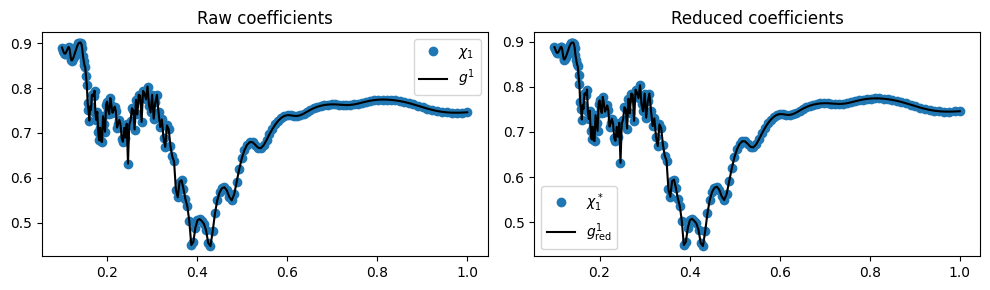

In [5]:
n = 16
i = 1
chik = legendre_coeffs_from_df(Psca, quad_pts=n)

f = chik[2*n,:]
chik_red = (chik[i,:] - f)/(1 - f)
g_red = (gcos**i - gcos**(2*n))/(1 - gcos**(2*n))

fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].plot(lam, chik[i,:], 'o', label = r'$\chi_{%i}$' % i)
ax[0].plot(lam, gcos**i, '-k', label = '$g^{%i}$' % i)
ax[0].legend()
ax[0].set_title('Raw coefficients')

ax[1].plot(lam, chik_red, 'o', label = r'$\chi^*_{%i}$' % i)
ax[1].plot(lam, g_red, '-k', label = '$g_\mathrm{red}^{%i}$' % i)
ax[1].legend()
ax[1].set_title('Reduced coefficients')


plt.tight_layout()
plt.show()

### Comparing R and T from excact vs tabulated HG model

First we extract the simulation parameters

In [6]:
fv = 0.01                           # particle volume fraction
tfilm = 0.100                       # film thickness (um)

# compute scattering and absorption coefficients
k_sca = fv/Vp*Csca
k_abs = fv/Vp*Cabs

kz_imag = 2*np.pi/lam*Nh.imag*1E3   # imaginary part of wavevector (mm^-1)
mu_s = k_sca*1E3                    # scattering coefficient (mm^-1) 
mu_a = k_abs*1E3 + 2*kz_imag        # absorption coefficient (mm^-1)
g = gcos                            # asymmetry parameter
d = tfilm                           # film thickness (mm)
a = mu_s/(mu_a+mu_s)
b = (mu_a+mu_s)*d

R and T from tabulated phase function

In [7]:
s = Sample(a=a, 
           b=b, 
           d = d, 
           quad_pts=16, 
           pf_type="TABULATED", 
           pf_data=Psca)      # transpose -> index = μ, 1 column

R_lam, T_lam, *_ = s.rt()

R and T from exact HG solution (standard adding-doubling method)

In [8]:
s = Sample(a=a, b=b, d = d, g=gcos, quad_pts=16)    # λ-column 0
R_lam_HG, T_lam_HG, *_ = s.rt()

Results match exactly

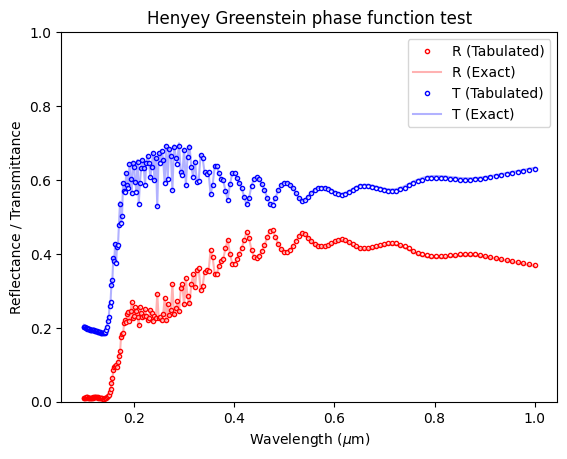

In [9]:
plt.plot(lam, R_lam, 'o r', label = 'R (Tabulated)', ms = 3.0, mfc = 'w')
plt.plot(lam, R_lam_HG, '-r', label = 'R (Exact)', alpha = 0.3)
plt.plot(lam, T_lam, 'o b', label = 'T (Tabulated)', ms = 3.0, mfc = 'w')
plt.plot(lam, T_lam_HG, '-b', label = 'T (Exact)', alpha = 0.3)
plt.legend()
plt.ylim(0,1)
plt.ylabel('Reflectance / Transmittance')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.title('Henyey Greenstein phase function test')
plt.show()

## Comparing HG against exact phase function from Mie theory

In [10]:
theta_eval = np.linspace(0, np.pi, 100)
Psca_mie = mie.phase_scatt(lam, Nh, Np, Dp, theta=theta_eval)

In [11]:
mu_theta = np.cos(theta_eval)
Psca_mie.index = mu_theta
Psca_mie.index.name = 'cos(theta)'

In [12]:
R_lam_mie = np.zeros_like(lam)
T_lam_mie = np.zeros_like(lam)

s = Sample(a=a, 
           b=b, 
           d = d, 
           quad_pts=16, 
           pf_type="TABULATED", 
           pf_data=Psca_mie)      # transpose -> index = μ, 1 column

R_lam_mie, T_lam_mie, *_ = s.rt()

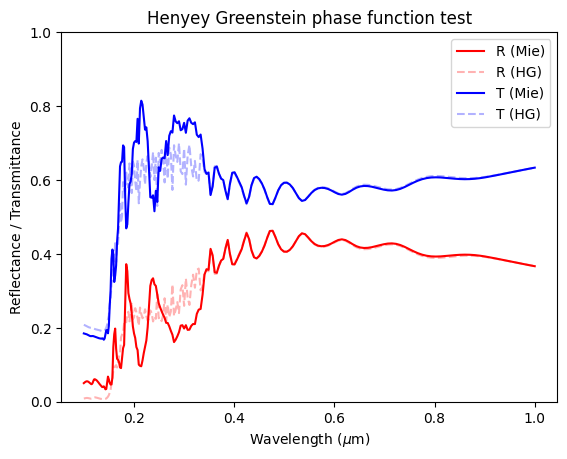

In [13]:
plt.plot(lam, R_lam_mie, '-r', label = 'R (Mie)', ms = 5.0, mfc = 'w')
plt.plot(lam, R_lam_HG, '--r', label = 'R (HG)', alpha = 0.3)
plt.plot(lam, T_lam_mie, '-b', label = 'T (Mie)', ms = 5.0, mfc = 'w')
plt.plot(lam, T_lam_HG, '--b', label = 'T (HG)', alpha = 0.3)
plt.legend()
plt.ylim(0,1)
plt.ylabel('Reflectance / Transmittance')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.title('Henyey Greenstein phase function test')
plt.show()

## Comparing HG against exact phase function from Solid Hard Sphere


In [14]:
phase_scat_dense = mie.phase_scatt_dense(lam, Nh, Np, Dp, fv, theta = theta_eval)

(200,) (200,)


In [15]:
mu_theta = np.cos(theta_eval)
Psca_mie.index = mu_theta
Psca_mie.index.name = 'cos(theta)'

In [16]:
R_lam_mie = np.zeros_like(lam)
T_lam_mie = np.zeros_like(lam)

s = Sample(a=a, 
           b=b, 
           d = d, 
           quad_pts=16, 
           pf_type="TABULATED", 
           pf_data=phase_scat_dense)      # transpose -> index = μ, 1 column

R_lam_mie, T_lam_mie, *_ = s.rt()

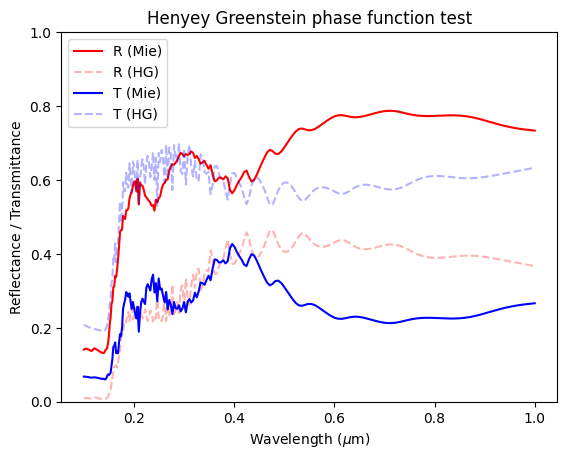

In [17]:
plt.plot(lam, R_lam_mie, '-r', label = 'R (Mie)', ms = 5.0, mfc = 'w')
plt.plot(lam, R_lam_HG, '--r', label = 'R (HG)', alpha = 0.3)
plt.plot(lam, T_lam_mie, '-b', label = 'T (Mie)', ms = 5.0, mfc = 'w')
plt.plot(lam, T_lam_HG, '--b', label = 'T (HG)', alpha = 0.3)
plt.legend()
plt.ylim(0,1)
plt.ylabel('Reflectance / Transmittance')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.title('Henyey Greenstein phase function test')
plt.show()